In [5]:
####scale은 정규화만해도 충분하고 분산값이 너무클때만 표준화.(근데 빅데이터는 분산구하는게 쉽지않아서 정규화해서 test, 표준화도 되면 test해서 성능좋은걸비교)

In [1]:
##############################################
# Modeling
##############################################
from tensorflow.keras import layers, models
 
def ANN_seq_func(Nin, Nh, Nout):
    model = models.Sequential()
    """ Keras 모델 시작 """

    model.add(layers.Dense(Nh,activation='relu',input_shape=(Nin,)))
    """입력 계층 노드 수 Nin 개,  은닉 계층의 노드 수 Nh 개, 활성함수는 relu  """

    model.add(layers.Dense(Nout,activation='softmax'))
    """출력 노드 수 Nout 개,  활성함수는  softmax (다중 분류문제이므로) """

    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

    """오차(비용) 함수는 categorical_crossentropy, <--(활성함수를 softmax를 사용함으로)
       최적화 함수는 adam 을 사용. SGD(확률적경사하강법) 써도 됨 
    Classification Performance metrics(분류 성능 척도) 는 'accuracy'
    """

    return model

In [29]:
##############################################
# Data
##############################################
from tensorflow.keras import datasets  # mnist
# from tensorflow.keras.utils import np_utils  #to_categorical
from tensorflow.keras.utils import to_categorical

def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
    """ 이미지 데이터 X ,  0~9까지 붙인 이름표를 Y   
    70,000개의 데이터 중 60,000개를 학습 데이터로,  10,000개를 테스트 데이터로 읽어옵니다. 
    """

    Y_train = to_categorical(y_train)
    Y_test = to_categorical(y_test)
    """원-핫 인코딩을 위해 케라스의 np_utils 의 to_categorical() 함수를 사용
     0 ~ 9까지의 정수 값을 갖는 형태가 아닌 0 이나 1로 이뤄진 벡터로 수정 
     만약에 '3' 이라는 숫자이라면 [0, 0, 1, 0, 0, 0, 0, 0, 0]으로 변환 
    """

    L, W, H = X_train.shape 
    print(L, W, H)  #6000 28 28 (xtrain에 28x28 size에 글자가있고 그런게 60000장있는거임)
    
    X_train = X_train.reshape(-1,W*H)
    X_test = X_test.reshape(-1,W*H) 
    """ 행 갯수는 상관없고, 열은 28*28(-> 784 )로 reshape 60000개의 이미지를 모두 한줄로표현 """
 
    X_train = X_train / 255.0
    X_test = X_test / 255.0
    """ 원래 데이터가 0~255 인데 0~1로  변환""" #정규화 (minmaxscaler 돌린거랑똑같은결과)

    return (X_train, Y_train), (X_test, Y_test)


60000 28 28
Epoch 1/15
480/480 [==============================] - 1s 2ms/step - loss: 0.3915 - accuracy: 0.8913 - val_loss: 0.2102 - val_accuracy: 0.9423
Epoch 2/15
480/480 [==============================] - 1s 2ms/step - loss: 0.1850 - accuracy: 0.9463 - val_loss: 0.1691 - val_accuracy: 0.9513
Epoch 3/15
480/480 [==============================] - 1s 2ms/step - loss: 0.1350 - accuracy: 0.9610 - val_loss: 0.1297 - val_accuracy: 0.9624
Epoch 4/15
480/480 [==============================] - 1s 2ms/step - loss: 0.1061 - accuracy: 0.9693 - val_loss: 0.1177 - val_accuracy: 0.9647
Epoch 5/15
480/480 [==============================] - 1s 2ms/step - loss: 0.0863 - accuracy: 0.9758 - val_loss: 0.1073 - val_accuracy: 0.9673
Epoch 6/15
480/480 [==============================] - 1s 2ms/step - loss: 0.0722 - accuracy: 0.9789 - val_loss: 0.1035 - val_accuracy: 0.9682
Epoch 7/15
480/480 [==============================] - 1s 2ms/step - loss: 0.0606 - accuracy: 0.9829 - val_loss: 0.0975 - val_accuracy: 0

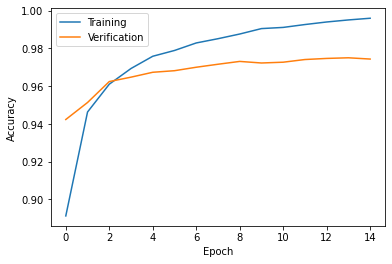

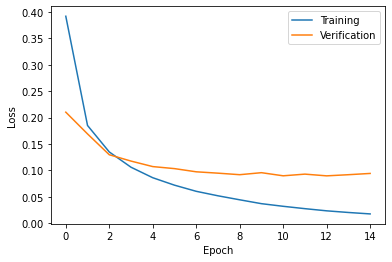

In [30]:
##############################################
# Main   # 분류 ANN 학습 및 성능 분석 
##############################################
import matplotlib.pyplot as plt
%matplotlib inline 

def main():
    Nin = 784
    Nh = 100 #정해진건없고 최종출력층보다만많으면됨(?)
    number_of_class = 10
    Nout = number_of_class

    model =ANN_seq_func(Nin,Nh,Nout)
    (X_train, Y_train), (X_test, Y_test) =Data_func()

    ##############################################
    # Training
    ##############################################
    history =model.fit(X_train,Y_train,epochs=15,batch_size=100,validation_split=0.2)
    """학습 """

    performace_test = model.evaluate(X_test,Y_test,batch_size=100)
    """평가 """
    print('Test Loss and Accuracy ->', performace_test)

    history = history.history
    """정확도 변화 추이 그래프"""
    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'] )
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    plt.show()

    """Cost/Loss  변화 추이  그래프"""
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    plt.show()


if __name__ == '__main__':
    main()


#### 학습한데이터보다 검증하지않은데이터가 능률이 떨어짐 :training>vertification